# a) Defining the Question
Financial Inclusion remains one of the main obstacles to economic and human development in Africa.  Having a bank account has been considered to be one of the financial inclusion towards this goal in Africa
In this project we are going to :
**Figure out how we can predict which individuals are most likely to have or use a bank account ?**. 

Our solution will be  help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic components that might
drive individuals’ financial outcomes. 

# b) Specifying the Data Analytic Question
## FORMULATED  HYPOTHESIS
# Null Hypothesis(Ho):  
The condition that an individaul  ave a bank account is depeneded  on  type of location , Marrital status, cell phone,Level of Educuation	,Type of Job,Respondent Age, and 	gender of respondent 
 
# Alternative Hypothesis(H1):
Having a bank account is not associated on ype of location , Marrital status, cell phone,Level of Educuation	 and Type of Job, Respondent Age, and 	gender of respondent 
 

# c) Defining the Metric for Success
Find out parameters that tells whether  an individual has a bank account or not .
We shall reject the hypothesis  if the P-value is greater than significance value or not reject the hypothesis if the P-value is greater than significance level. It willl be compared with the  the crical value to determine it. We shall also  calaculate the PCA in order to determine whether the model will shall predict will have an accuracy level of more than 85%.
To attain the measurement of accuracy , we shall  divide the population to a training sample and  a test sample.



## Data Relevance

Here we get to import labriries that wil be used  in this analysis


In [0]:
#Import libraries
#Reading the Data
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Seaborn
import seaborn as sns
anomalies = []
import seaborn as sb
# importing linear regression from sci kit learn
from sklearn.linear_model import LinearRegression

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
# importing random module
# we will use random.sample() function to return a k length 
# list of unique elements chosen from our population
import random

# Reading the dataset
Our dataset is in form of URl  and so we shall first  read our dataset by loading the The URL   in this collab by using pandas  which is stated as (pd)

In [0]:
#Loading the Data from the source
#defination= http://bit.ly/VariableDefinitions 
#Dataset=http://bit.ly/FinancialDataset 
# our datasframe will be called (df)
# the first dataframe is called defination and this defines  what column names  mean in our dataset.
definations= pd.read_csv("http://bit.ly/VariableDefinitions")
df= pd.read_csv("http://bit.ly/FinancialDataset")
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# Checking Data
Here we get to explore more about the dataset such as  shape of our dataset,head and tail,type of data type in the columns, whether we have  null values in the  data set.

In [0]:
# Determining the no. of records in our dataset
# in this code we want to fine the number of raws and the number of columns in our dataset.
# the dataset has 23524 raws and 13 columns.
df.shape

(23524, 13)

In [0]:
# Previewing the top of our dataset
#In the dataset difination we get to explore what the column names really mean in our main dataset
# example of what  a column and  explanation is Year, this means the "year" in which the "Year survey was done in"
definations

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [0]:
# Previewing the bottom of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# converting categorical data  numerical data
# Under has a bank account yes is converted to 1 while No is converted to 0

df['Has a Bank account']=df['Has a Bank account'].map({'No':0, 'Yes':1})
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# converting categorical data  numerical data
# Under Type of Location Urban is converted to 1 while Rural  is converted to 0
df['Type of Location']=df['Type of Location'].map({'Rural':0, 'Urban':1})
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,0.0,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,0.0,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,1.0,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,0.0,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,1.0,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# converting categorical data  numerical data
# Under cell phone access yes is converted to 1 while No is converted to 0

df['Cell Phone Access']=df['Cell Phone Access'].map({'No':0, 'Yes':1})
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,0.0,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,0.0,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,1.0,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,0.0,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,1.0,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# converting categorical data  numerical data
# Under gender Male is converted to 1 while Female is converted to 0

df['gender_of_respondent']=df['gender_of_respondent'].map({'Female':0, 'Male':1})
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,0.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,0.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,1.0,1.0,5.0,26.0,1.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,0.0,1.0,5.0,34.0,0.0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,1.0,0.0,8.0,26.0,1.0,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#checking the information  in our dataset
#In this code we get to  have an exploration overview of the number of raws  depending on each column and the datatype they contain.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null float64
Type of Location          23509 non-null float64
Cell Phone Access         23513 non-null float64
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null float64
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 2.3+ MB


In [0]:
#Checking whether each column has an appropriate datatype
#Some of the data type that we have in this dataset are intergers,objects and floats
# 10 columns have object, 2 columns had floats and 1 column  had intergers 
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account        float64
Type of Location          float64
Cell Phone Access         float64
household_size            float64
Respondent Age            float64
gender_of_respondent      float64
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [0]:
# checking sum of null missing values in each column
# each column has  missing values appart from only 2 column and  that is year and uniqueid

df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
# checking the profile of our dataset
# We are curious to know a brief  summary  our dataset  and may not be limited  to:
#missing values in a column How are the features co-related? What is the max, min or Outlier in the data?
# what insights can we get one we  plot and Visualize this data and see the details.

#There are functions available in Pandas to get that insight like describe,info etc. 
#but those are pretty basics and with the help of Data Visualization tools like matplotlib, seaborne and plotly we can plot the visualization as well.


#Documentation Following Statistics is generated for each of the column:

#Essentials: type, unique values, missing values
#Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
#Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
#Most frequent values Histogram
#Correlations highlighting of highly correlated variables, Spearman and Pearson matrixes

import pandas_profiling


pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,7
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements of variables  are roughly in line with what they should be and it serves as a check on what other things might be wrong in our dataset.  Doing External validation can often be as simple as checking your data against a single number, as we will do here.

In [0]:
# in this code  we are aiming to findout the type of unique values we have in each column.
#printing all the uniques values in the country column

print(df.country.unique())

#printing all the uniques values in the Has a Bank account column

print(df['Has a Bank account'].unique())

#printing all the uniques values in the year column


print(df['year'].unique())
#printing all the uniques values in the of location column

print(df['Type of Location'].unique())
#printing all the uniques values in the unified column

print(df['uniqueid'].unique())
#printing all the uniques values in the cell phone column

print(df['Cell Phone Access'].unique())
#printing all the uniques values in the household column

print(df['household_size'].unique())

#printing all the uniques values in the respondent age column

print(df['Respondent Age'].unique())
#printing all the uniques values in the gender of respondent column

print(df['gender_of_respondent'].unique())
#printing all the uniques values in the   The relation with head column

print(df['The relathip with head'].unique())
#printing all the uniques values in the marital status column

print(df['marital_status'].unique())
#printing all the uniques values in the marital status column
print(df['Level of Educuation'].unique())
#printing all the uniques values in the type of job column

print(df['Type of Job'].unique())



['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
[ 1.  0. nan]
[2018 2029 2056 2016 2039 2017]
[ 0.  1. nan]
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
[ 1.  0. nan]
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
[ 0.  1. nan]
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]
['Secondary education' 'No formal education'
 'Vocation

# Tidying the dataset

Tidy data is a standard way of mapping the meaning of a dataset to its structure.

In this section we purpose to remove the  null values in our data set , check for outliers, drop unnessecary columns.

In [0]:
#dealing with missing values
# Since we noted that our dataset contained null values , this is the point where we act on them. 
# here   we deal with them by  dropping all of them
df=df.dropna()
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [0]:
# Dropping column
#  The reason why we are dropping this column is bacause  we feel that  it adds no values toward our analysis as we predict our model
dfdrop=df.drop('uniqueid',axis=1)
dfdrop.head(2)


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1.0,0.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0.0,0.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent


In [0]:
#renaming  columns from the dataset
## it was important for me to rename my column since others  contained  mispelled mispelled works,
# This was to avoid errors while running codes due to mispelled columns.
#after we rename our column we define our datraset  to df1
df0=dfdrop.rename(columns={'Respondent Age': 'respondent_age','Has a Bank account':'bank_account','Type of Location':'type_of_location','Cell Phone Access':'cell_phone_access','gender_of_respondent':'gender'	
                         ,'the_relathip_with_head':'relationship_with_head','level_of_educuation':'level_of_education'})

df0.head(2)

,country,year,bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1.0,0.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0.0,0.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent


In [0]:
# After  cleaning our dataframe df we  export it  csv file called df1. This helps us to keep the changes perment and avoid rerunning the dataframe again and again
df0.to_csv('df1.csv')

In [0]:
df1=pd.read_csv('df1.csv')
df1.head(1)

,Unnamed: 0,country,year,bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,Kenya,2018,1.0,0.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed


In [0]:
df1.columns

Index(['Unnamed: 0', 'country', 'year', 'bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age', 'gender',
       'The relathip with head', 'marital_status', 'Level of Educuation',
       'Type of Job'],
      dtype='object')



https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png
---



In [0]:
# In this part we are intersted to check  whether our numerical data have  outliers /anomalies
# this will be important because we will get to know whether they are important or not.
#  Thus dealing with them will help us  avoid skew interpretation of the data
# Checking for Outliers in the household size
#
# t
plt.figure(dpi=100)
df1.boxplot('household_size')            


# based on the boxplot plotted  from household size we can say we don't have outliers since most of the values are  within the range of Q1-Q3

In [0]:
# Checking for Outliers in the year
plt.figure(dpi=100)
df1.boxplot('year')


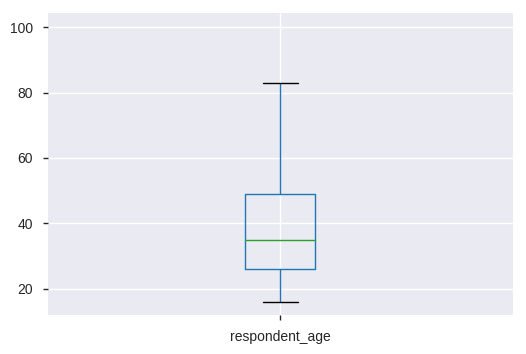

In [0]:
# checking for outliers in respondent age column
 
plt.figure(dpi=100)
df1.boxplot('respondent_age')
# In this column we have no outliers

In [0]:
 #From the column of year we found that we   that exceed 2018 so will i have drop them since they do not affect nor have any insights in our dataset
  # checking anomalies, anomalies are the same as outliers and so the outliers that were were identify are the sames as
yr= df1[df1['year']>2019].index

df1.drop(yr,inplace=True)
# checking uniques  years in the  dataset
df1.year.unique()
# from the outcomes we now have the right years because is only possible that the dataset 
#collected between 2016 to 2018 and not any other year beyond 2019

array([2018, 2016, 2017])

# 2. Exploratory Data Analysis: 




# 2.1 Univariate Analysis
It is section where we get to explore about one variable at a time . Here we get to calculate  the central tendacy ,Measures of Dispersion/Variability/Spread e.g standard deviation ,corelation and kurtosis.,We aslo do Visualisation Techniques by using pie charts, and histogram

## 2.1.1 Measures of Central Tendency

In [0]:
# finding out the mean of the numerical variables
#a number around which a whole data is spread out. 
# In a way, it is a single number of household size and respondent age which can estimate the value of whole data set.

print (df1['household_size'].mean())
print (df1['respondent_age'].mean())

3.688560411311054
38.80706940874036


In [0]:
# finding out the median
# Median is the value which divides the data in 2 equal parts i.e. number of terms on right side of it 
# is same as number of terms on left side of it when data is arranged in either ascending or descending order in both household size and respondent age.

print (df1['household_size'].median())
print (df1['respondent_age'].median())

3.0
35.0


In [0]:
#finding the  mode
# Mode is the term appearing maximum time in both household size and respondent age i.e. term that has highest frequency.

print (df1['household_size'].mode())
print (df1['respondent_age'].mode())


0    2.0
dtype: float64
0    30.0
dtype: float64


In [0]:
# finding out the mode
#The most apperaing year is  2016
df1['year'].mode()


0    2016
dtype: int64

In [0]:
# This section describe a brief statistical analysis in our data

df1.describe()

,Unnamed: 0,year,bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender
count,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000
mean,11723.964781,2016.977464,0.141217,0.388903,0.742545,3.688560,38.807069,0.410197
std,6793.967888,0.849136,0.348253,0.487512,0.437241,2.281275,16.519905,0.491880
min,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,5840.750000,2016.000000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000
50%,11679.500000,2017.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000
75%,17596.250000,2018.000000,0.000000,1.000000,1.000000,5.000000,49.000000,1.000000
max,23523.000000,2018.000000,1.000000,1.000000,1.000000,21.000000,100.000000,1.000000


## 2.1.2 Measures of Dispersion/Variability/Spread

random selection of a sample

In [0]:
# since our population  had 23340 raw  we decided to take a sample of 1000 raws and work with it
# the sample is randomly generated from the main population.
# Determining the size
#print(df1.shape
# previewing dataset

## Selecting the sample

df1_sample = df1.sample(n=1000)
print(df1_sample)


       Unnamed: 0   country  ...  Level of Educuation           Type of Job
6473         6477    Rwanda  ...    Primary education   Informally employed
5652         5656     Kenya  ...  Secondary education         Self employed
11110       11117    Rwanda  ...    Primary education          Other Income
21609       21784    Uganda  ...    Primary education         Self employed
16908       16980  Tanzania  ...    Primary education         Self employed
7627         7634    Rwanda  ...    Primary education   Farming and Fishing
20624       20783  Tanzania  ...  No formal education   Informally employed
16638       16702  Tanzania  ...    Primary education  Remittance Dependent
23306       23481    Uganda  ...  No formal education         Self employed
14477       14532    Rwanda  ...  No formal education  Remittance Dependent
22552       22727    Uganda  ...    Primary education         Self employed
11530       11537    Rwanda  ...    Primary education  Government Dependent
22351       

In [0]:
# calculating the mean of the sample population
print(df1_sample["household_size"].mean())
print(df1_sample["respondent_age"].mean())

3.697
38.905


Standard Deviation 

In [0]:
# Finding the standard deviation
#That is, how household_size and respondent_age are  spread out from mean. A low standard deviation indicates that the data points 
# tend to be close to the mean of the data set, while a high standard deviation indicates that the 
# data points are spread out over a wider range of values.
# There are situations when we have to choose between sample or population Standard Deviation. 
# When we are asked to find SD of some part of a population, a segment of population; 
# then we use sample Standard Deviation. But when we have to deal with a whole population, 
# then we use population Standard Deviation. As you know, in descriptive statistics, 
# we generally deal with a data available in a sample, not in a population.

df1_sample.std()
#our sample size standard deviation is as  shown below.
#Based on the results we have we can say that respondent age is highly spread from the mean which is 38.80706940874036

Unnamed: 0           6911.388430
year                    0.854031
bank_account            0.328602
type_of_location        0.487307
cell_phone_access       0.440483
household_size          2.266347
respondent_age         16.256145
gender                  0.492079
dtype: float64

Variance

In [0]:
# variance is square root of the std.It  will help us to measure how dispersed our data is

#If our data  has a variance  of zero, it will mean that every number of it is the same but if we will get higher variance and mosr so a variace  higher the mean
# it will mean that  the our data had  dis-similarities.Considering  our mean as  the center of reference we will see how the the data is  scattered


# Finding the variance of the herbicide average prices
df1_sample.var()
# dased on the results we can conclude  and say that: the household size  is slightly  dispered but comparing  it with the respondent age  we can say that the 
# the respondent age highly scattered.

Unnamed: 0           4.776729e+07
year                 7.293684e-01
bank_account         1.079790e-01
type_of_location     2.374685e-01
cell_phone_access    1.940250e-01
household_size       5.136327e+00
respondent_age       2.642622e+02
gender               2.421421e-01
dtype: float64

Range

In [0]:
# Finding the range  helps us to know the difference between the maximum point and the minimum point
print(df1_sample["household_size"].max() - df1_sample["household_size"].min())



print(df1_sample["respondent_age"].max() - df1_sample["respondent_age"].min())


14.0
78.0


Quantiles

In [0]:
 
# In statistics and probability, quartiles are values that divide your data into quarters provided data is sorted in an ascending order. 
# There are three quartile values. First quartile value is at 25 percentile. 
# Second quartile is 50 percentile and third quartile is 75 percentile. 
# Second quartile (Q2) is median of the whole data. First quartile (Q1) is median of upper half of the data. 
# And Third Quartile (Q3) is median of lower half of the data.
# ---
print(df1["respondent_age"].quantile([0.25,0.5,0.75]))
print(df1["household_size"].quantile([0.25,0.5,0.75]))


0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


Skewness

In [0]:
# In Skewness  we are interested to  measure  the asymmetry of the probability distribution of our data
# we expect our skwness  value to be either  a positive or negative, or undefined.
# If we get that distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,
# it will  mean that mean is less than the mode. This situation is also called negative skewness.
#If our distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
# This will mean that the  mean is greater than the mode. This situation  will  be  called positive skewness.

print(df1['respondent_age'].skew())
print(df1['household_size'].skew())
#In both households and respndent we have  distribution  positive skewed value and so we can conclusively say that the distibution is skewed to the right ,meaning that mean is greater than the mode

0.8406145812311228
0.9741827150450616


Kurtosis

In [0]:
#Kurtosis  measures  the heaviness of tail in any given data.
# since our data contained outliers we except to have a heavy tail because this how  outliers can be manifested
#in comparision with the narmal distribution.

print(df1["household_size"].kurt())
print(df1["respondent_age"].kurt())
# In both variables,kurtosis is greater than zero, then the distribution has heavier tails and is called 
#a leptokurtic distribution.
#In Household size variable,the kurtosis was 1.154, while in respondent age was 0.09
# this indicated that household size had thicker and heavier in tail compared to respondent age 
#which had a kurtosis of close to zero(0.09)

1.1538357462528523
0.09826807013177241


In [0]:

df1.groupby('bank_account')['household_size'].sum()


bank_account
0.0    74361.0
1.0    11730.0
Name: household_size, dtype: float64

In [0]:
df1.groupby('country').household_size.sum()

country
Kenya       24170.0
Rwanda      38924.0
Tanzania    12556.0
Uganda      10441.0
Name: household_size, dtype: float64

In [0]:
df1.groupby('type_of_location').household_size.sum()

type_of_location
0.0    59729.0
1.0    26375.0
Name: household_size, dtype: float64

In [0]:
df1.groupby('year').household_size.sum()

year
2016    38924.0
2017    12556.0
2018    34611.0
Name: household_size, dtype: float64

## 2.1.3  Univariate Visualisation Techniques

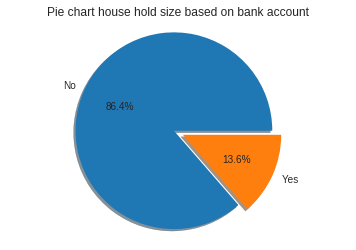

In [0]:
## Pie chart for house hold and bank acoount
#Here we are interested to  compare btween those that own  a bank account and those that have don't have 

w = df1.groupby('bank_account')['household_size'].sum()
label=('No','Yes')

#edl = df1["bank_account"].unique().tolist()
explode = [0,0.1]

plt.pie(w, explode=explode,labels = label,  autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.title('Pie chart house hold size based on bank account')
plt.show()
# those without bank account are many by 20 compared to those that have.

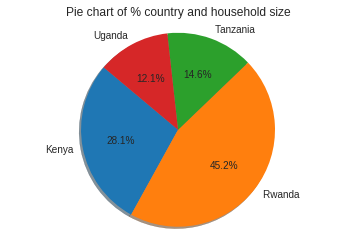

In [0]:
# Distribution of household sizes by count with country
x=df1.groupby('country')['household_size'].sum()
#.plot.pie()
labels=['Kenya','Rwanda ','Tanzania','Uganda']


explode=(0,0,0,0)
plt.pie(x, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)


plt.axis('equal')
plt.title('Pie chart of % country and household size')
plt.show()

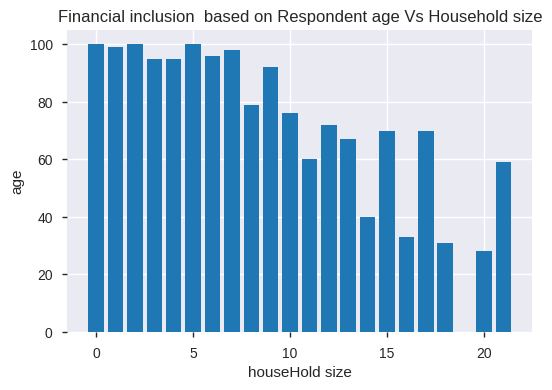

In [0]:
#plotting a histogram of financial inclusion based on responsent  age against  household size
plt.figure(dpi=100)
ff = df1['household_size']
age = df1["respondent_age"]
plt.bar(ff, age)
plt.ylabel("age")
plt.xlabel("houseHold size")
plt.title("Financial inclusion  based on Respondent age Vs Household size")
plt.show()
#Based on the this histogram,household size of  1 was Leading interms of  age  witha a  maximum of 100 together with  household  size of 3 and 5
# Household size of around 19 had a  respondent age of zero will 20 had  around 28

Text(0.5, 1.0, 'COUNTRY VS THE NUMBER OF HOUSEHOLD')

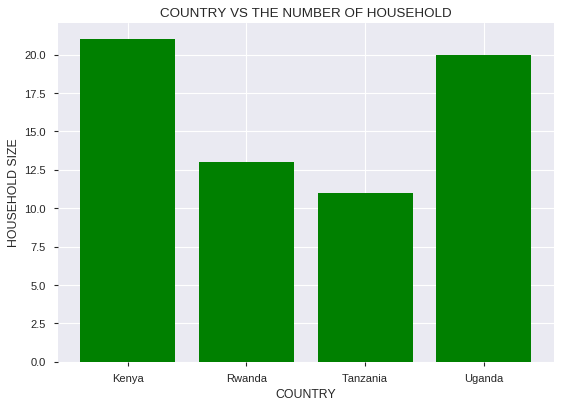

In [0]:
# distribustion of household sizes in  relation to countries and the household_size
# Defining our data
plt.figure(dpi=80)
country = df1['country']
house =  df1["household_size"]
plt.bar(country, house, color='green')
# Labelling our x axis
plt.xlabel("COUNTRY")
# Labelling our y axis
plt.ylabel("HOUSEHOLD SIZE")
# Giving a title to our Bar chart
plt.title("COUNTRY VS THE NUMBER OF HOUSEHOLD")
#bar(histXout, histFreq/sum(histFreq)*100);
# Displaying our
#From the  the histogram  that we have  the maximum household size was  around 21.5.
# Kenya was leading  withe the highes number of households  size of 21.5 it was then closely follwed  by Uganda.
# Tanzania was the one  that had least number of household size of around  11

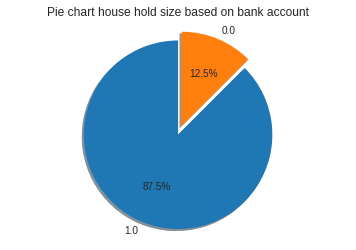

In [0]:
## Pie chart for house hold and bank acoount

hls = df1["household_size"].sample(2)
edl = df1["bank_account"].unique().tolist()
explode = [0,0.1,]

plt.pie(hls, explode=explode, labels=edl, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie chart house hold size based on bank account')
plt.show() 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


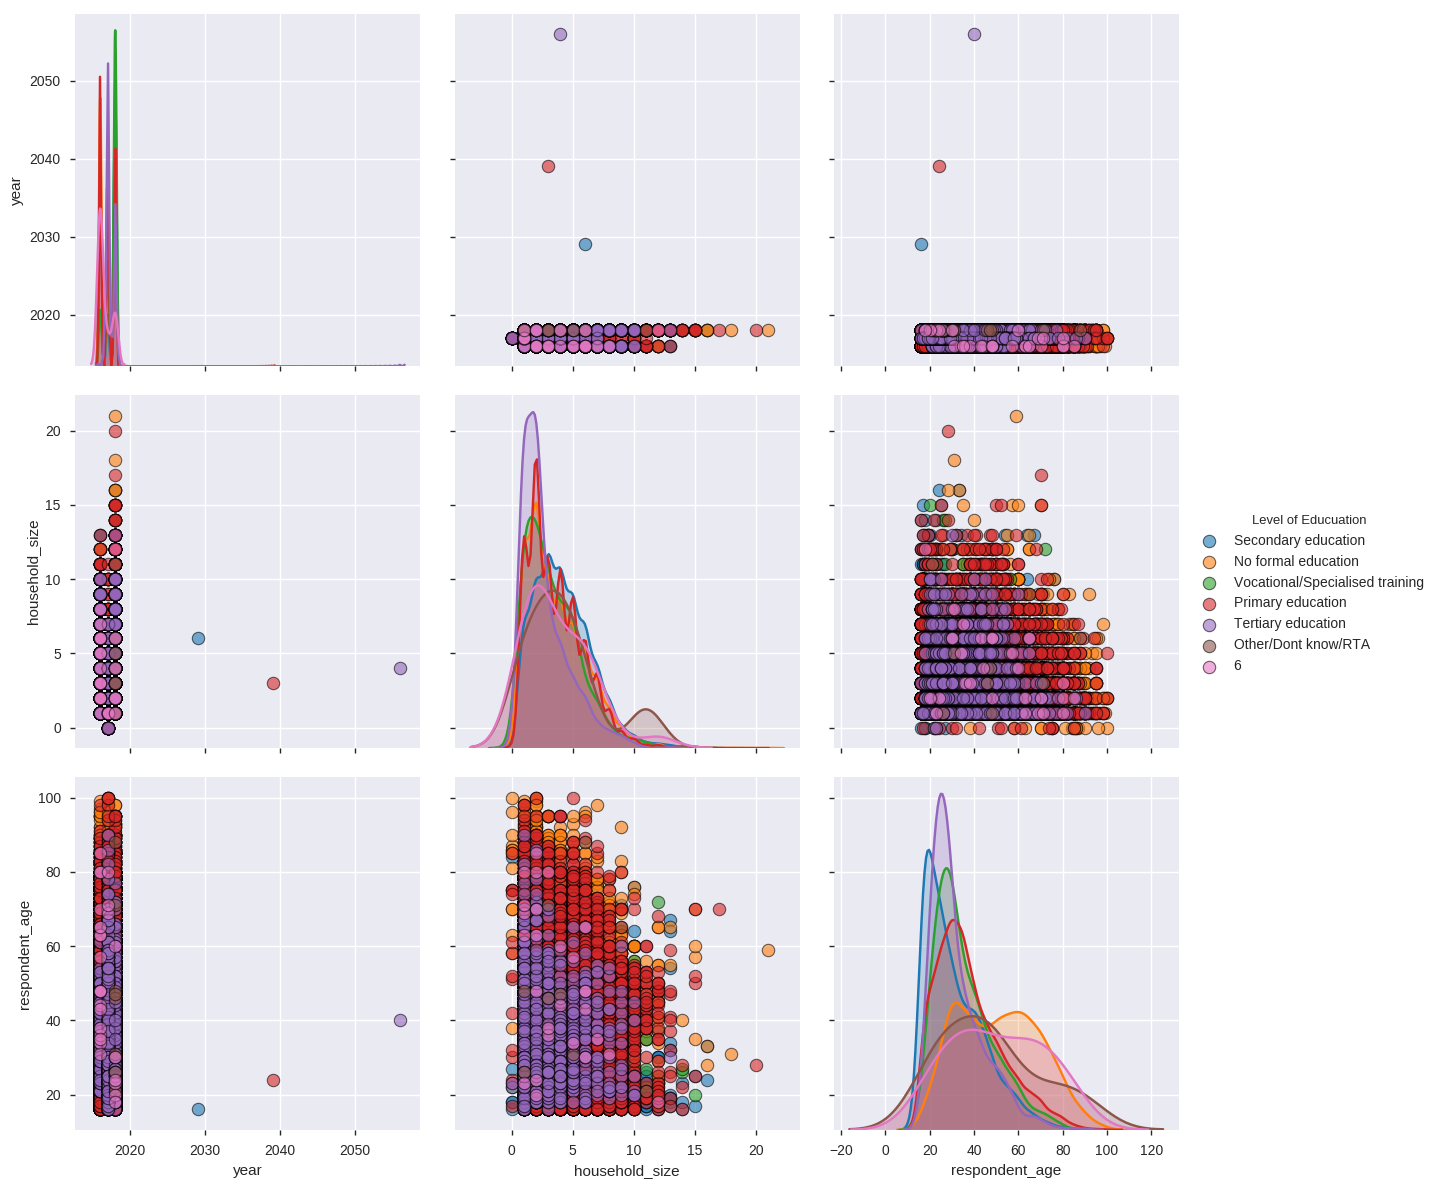

In [0]:
# Create a pair plot colored by  with a density plot of the 
# diagonal and format the scatter plots.
sns.pairplot(df1, hue = 'Level of Educuation', diag_kind = 'kde',
plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)
# based on what has has been returned in terms of level of education 
# people who had accounts were those who have tertiary level of education

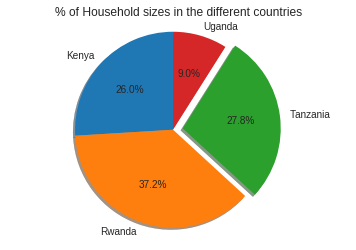

In [0]:
# Distribution of household sizes by count with country
country = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
household = [6062, 8683, 6500, 2095]
explode = [0, 0, 0.1, 0]
# 
plt.pie(household, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('% of Household sizes in the different countries')
plt.show()
# it shows that Rwanda had the highest number of  household sizes followed by  Tanzania

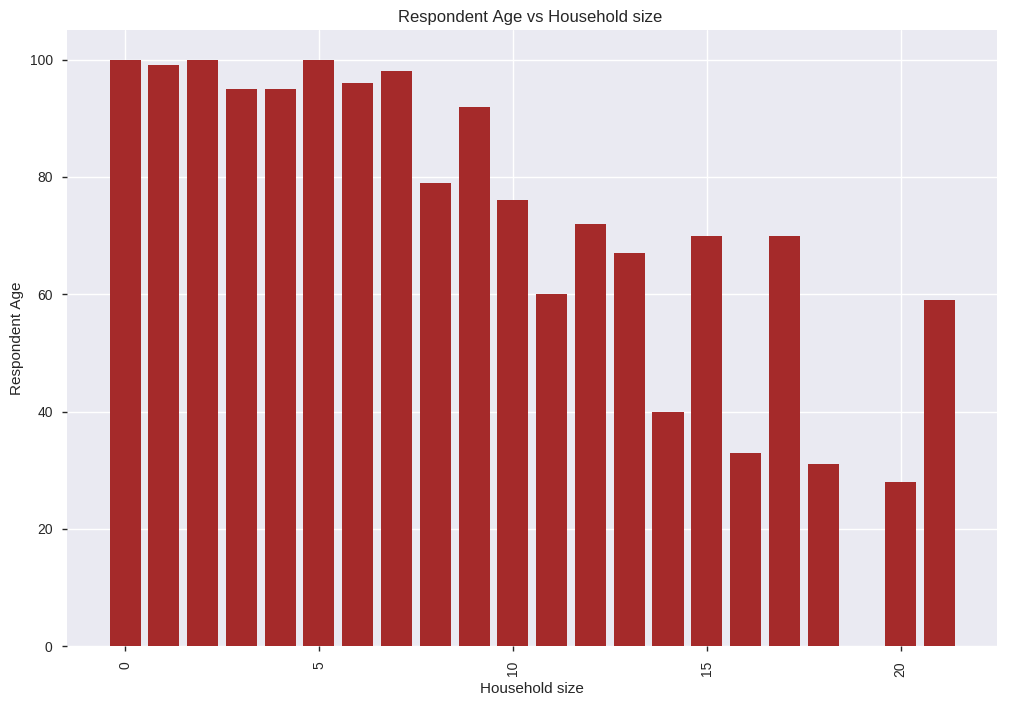

In [0]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df1.household_size, df1.respondent_age, color='brown')
plt.xticks(rotation=90)
ax.set_xlabel('Household size')
ax.set_ylabel('Respondent Age')
plt.title('Respondent Age vs Household size ')
plt.show()

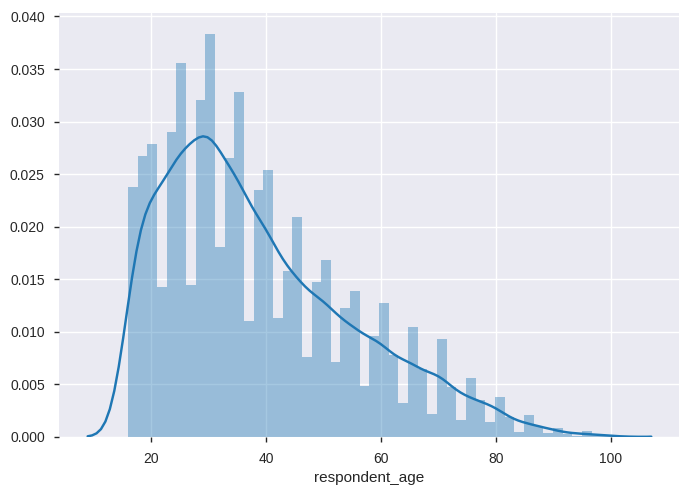

In [0]:
# Plotting a histogram of the respondent's ages
# proj['respondent_age'].hist()
#
sns.distplot(df1.respondent_age, kde = True)
# as the number respondent age increase its count decreases
# the highest count is between respondent age of 10 to 46
#his shows the smooth curve that tell as that as the respondent age increases the frequency decrease
#It means that the respondent age was positively skewed

In [0]:
sns.distplot(df2.household_size, kde = True)
# the highest count is 5
#As the number of household size increasres the number of count decreases
# Noted that frequence of household size is also fractuating but at the end it normalises

# Bivariate  analysis

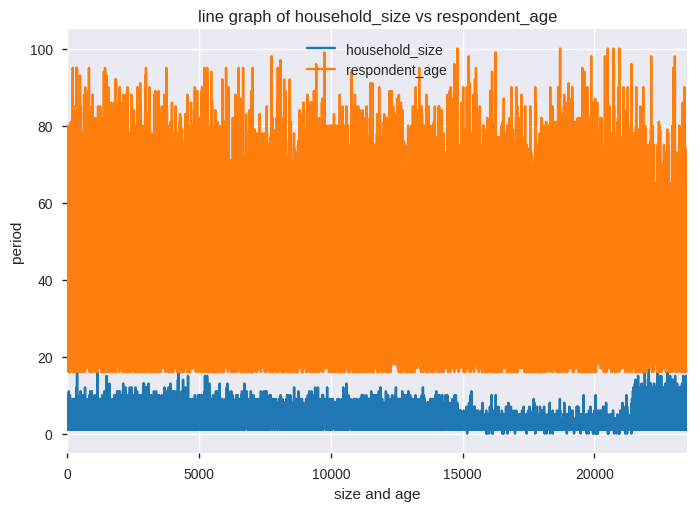

In [0]:

df1[['household_size','respondent_age']].plot()
plt.title('line graph of household_size vs respondent_age')
plt.xlabel('size and age')
plt.ylabel('period')
plt.show()

In [0]:


#Plotting our scatterplot to compare the variables
plt.scatter(df1['household_size'],df1['respondent_age'])


#title
plt.title('Household_size vs respondent age')
#labelling x axis
plt.xlabel('Household size')
plt.ylabel('respondednt size')
plt.show()

# The graph below is skewed to the left  that means that its one tail skewed to the left side with a left distribution.

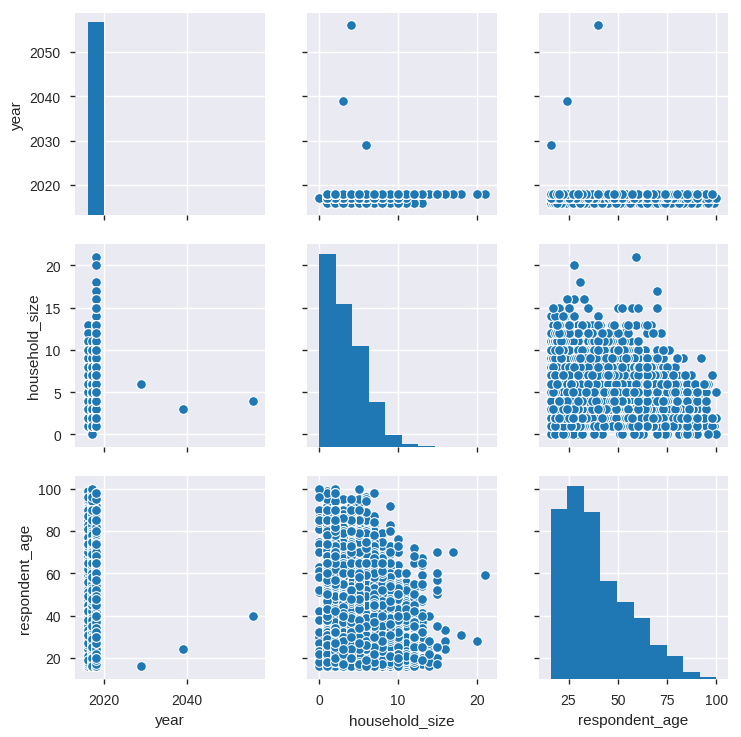

In [0]:
# Creating a pairplot to build histograms and scatter plots.
# ---
sns.pairplot(df1)
# The pair plot was buld on two basic figures  and tha is histogram and scatter plot
#Histogram allowed me to view the distribution of variables.
# scatter plot allowed me to see res the relationship between the variables
#

In [0]:
plt.figure(dpi=80)
sns.pairplot(df1 ,hue = 'bank_account')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


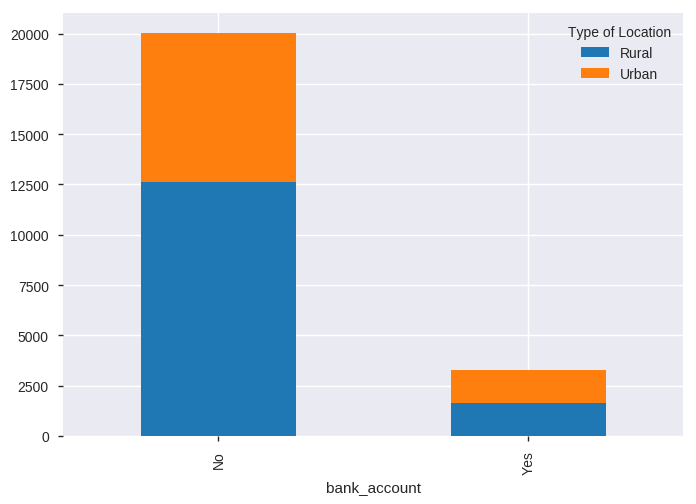

In [0]:
#Stacked bar plot with two-level group byPermalink

df1.groupby(['bank_account','Type of Location']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#From the stacked bar graph  there were people  without bank accounts and  a bigger portion was from rural areas
# Those that possed a bank account were almost the same in urban and rural areas

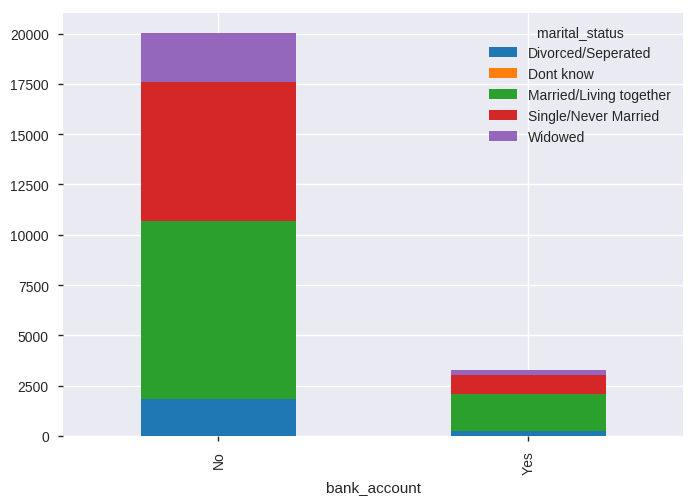

In [0]:
df1.groupby(['bank_account','marital_status']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#In both Yes and No bank accounts married people were the one leading i n terms of  all those that contained the bank account followed by single  individuals 
# possibility are the number could also increase especial where we have respondent age approaching marriage.

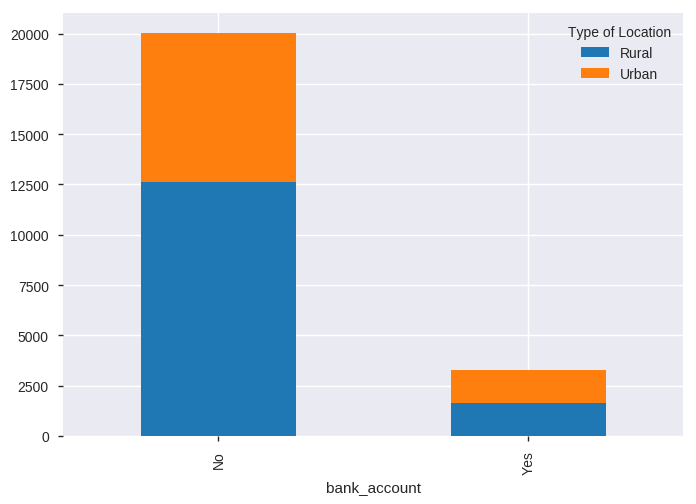

In [0]:
df1.groupby(['bank_account','Type of Location']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
# generally Urban areas were leading in terms of individuals who had bank account 

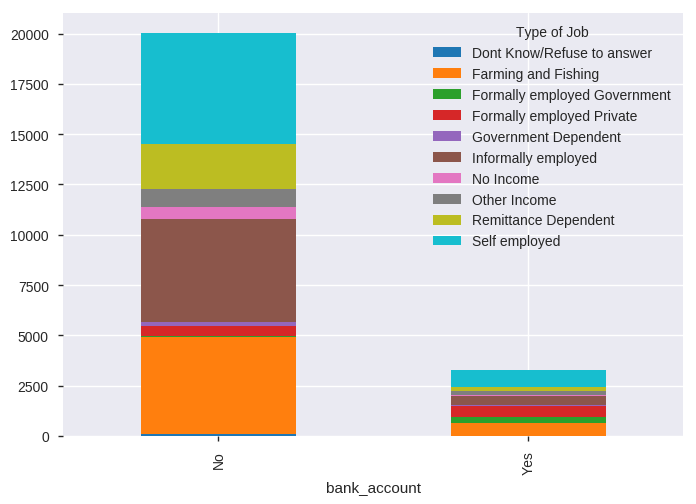

In [0]:
df1.groupby(['bank_account','Type of Job']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#From the graph we can relate both the bank Accounts and job
#Many  of those who had bank accounts were farmers/fishers and self employmed
#Most of those who had bank account were self employed,formally employed private  and  those doing farming and fishing
# we can also note the In both individuals under yes  and No Formally employed private was almost equal.
#  Also based on Type of job ,Those who were  self employed,farmer and fisherers as well as those with remittance Dependent took a bigger proportion of those
#individuals  without bank account


In [0]:
#Correlation
#Correlation is a statistical measure that describes the association between random variables. 
#In this section, will use pandas to calculate the correlation coefficient. 
#We will calculate the pearson correlation coefficient which is the most widely used correlation coefficient.

 #Determine the relationship between the repondents age in relation  households sizes 
# Calculating the pearson coefficient
p_coeff = df1["respondent_age"].corr(df1["household_size"], method="pearson") 
print(p_coeff)

# Checking whether you have to define the pearson
coeff = df1["respondent_age"].corr(df1["household_size"]) 
print(coeff)
# Correlation coefficients between -.20 and .20 are generally considered weak, 
# A negative (inverse) correlation occurs when the correlation coefficient is less than 0 
# and indicates that both variables(respondent age and househol sizea)  are know to move in the opposite direction. 
#-0.11970929714642344
# Since the correlation coefficent of household_sizeis and Respondent_age" is  , Respondent_age and 
# this means that  are moderately correlated.

-0.11970919507762415
-0.11970919507762415


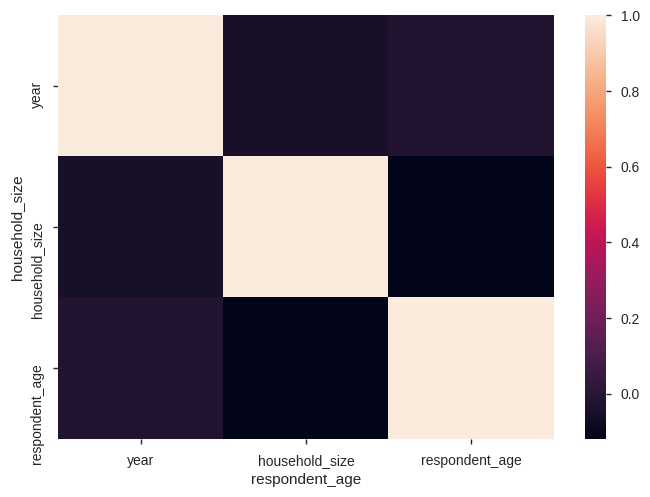

In [0]:
# Plotting the correlation using a heatmap.
# The dark colour represents that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.
# ---
plt.figure(dpi=100)

sns.heatmap(df1.corr())
plt.xlabel("respondent_age")
plt.ylabel("household_size")
plt.show()

# Multivariate Analysis

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [0]:
df1.head()

,Unnamed: 0,country,year,bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,Kenya,2018,1.0,0.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,1,Kenya,2018,0.0,0.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent
2,2,Kenya,2018,1.0,1.0,1.0,5.0,26.0,1.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,3,Kenya,2018,0.0,0.0,1.0,5.0,34.0,0.0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,4,Kenya,2018,0.0,1.0,0.0,8.0,26.0,1.0,Child,Single/Never Married,Primary education,Informally employed


**preprocessing**

In [0]:
#turn column into dummy variable
#bank=pd.get_dummies(df2['bank_account'])
#bank.head()
pd.get_dummies(df1).head()

,Unnamed: 0,year,bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,0,2018,1.0,0.0,1.0,3.0,24.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,2018,0.0,0.0,0.0,5.0,70.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,2018,1.0,1.0,1.0,5.0,26.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,3,2018,0.0,0.0,1.0,5.0,34.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,2018,0.0,1.0,0.0,8.0,26.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
# Creating a pairplot to build histograms and scatter plots.
# The histogram on the diagonal allows us to see the distribution of a single 
# The scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
sns.pairplot(df1)

In [0]:
# Plot the correlation using a heatmap.
# The black colour represents that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.

plt.figure(dpi=150)

sns.heatmap(df1.corr())

In [0]:
#The first we divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
a= df1.drop(['country','year','bank_account','Type of Location','Cell Phone Access','gender_of_respondent','The relathip with head','marital_status','Level of Educuation','Type of Job'], axis=1)
b = df1['bank_account']

In [0]:
b.eq('Yes').mul(1)
pd.Series(np.where(b.values == 'yes', 1, 0),sample.index)
b.map(dict(Yes=1),No=1)
pd.Series(map(lambda x:dict(yes=1, no=0)[x],b.values.tolist()), sample.index)
pd.Series(np.searchsorted(['no', 'yes'], b.values), sample.index)


In [0]:
# Splitting the dataset into the Training set and Test set
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

In [0]:
# # Standardizing by use of standize scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)


In [0]:
#Applying PCA
# first we Initialize the PCA class by passing the number of components to the 
#Call the fit and then transform methods by passing the feature set
##
from sklearn.decomposition import PCA

pca = PCA()
a_train = pca.fit_transform(a_train)
a_test = pca.transform(a_test)
# in the code above  we created  a PCA object named pca
# thsi means all the three variables will be return in  both testing and training

In [0]:
# what follows is  explaining the variance ratio.
# the code below explian how variance ratio is done
##
explained_variance = pca.explained_variance_ratio_
explained_variance 
#the varianc ratio  of the two dataset is 0.56 and 0.44

In [0]:
# applying PCA projection
##
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
a = pca.fit_transform(a_train)
a_test = pca.transform(a_test)


### **Training and Making Predictions**


In [0]:
#In this case we'll use random forest classification for making the predictions.
# Random forest help to predict which  variable  have the most predictive power
# Variable of  importance  are 
#drivers of the outcome and their values  have signicant on the outcome
#Variables with low importance are omitted from the model
# This makes it easier  and faster  to fit  and predict 
# high or low importance is based on the level of  percentage of accuracy

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(a, b_train)

# Predicting the Test set results
b_pred = classifier.predict(a_test)


### Performance Evaluation


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(b_test, b_pred)
print(cm)
print('Accuracy',accuracy_score(b_test, b_pred))

In [0]:
# component two
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
a = pca.fit_transform(a_train)
a_test = pca.transform(a_test)


In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(a, b_train)

# Predicting the Test set results
b_pred = classifier.predict(a_test)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(b_test, b_pred)
print(cm)
print('Accuracy',accuracy_score(b_test, b_pred))

In [0]:
# both variables
from sklearn.decomposition import PCA

pca = PCA()
a = pca.fit_transform(a_train)
a_test = pca.transform(a_test)


In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(a, b_train)

# Predicting the Test set results
b_pred = classifier.predict(a_test)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(b_test, b_pred)
print(cm)
print('Accuracy',accuracy_score(b_test, b_pred))

In [0]:
#preprocessing
g=df2.drop('bank_account',axis=1)
h=df2['bank_account']

In [0]:
# Convert categorical variables to numerical values
g = pd.get_dummies(g)
g.head()

In [0]:
# Splitting the dataset into the Training set and Test set
# Our goal is to create a model that generalises well to new data. Our test set serves as a proxy for new data. 
# Trained data is the data on which we apply the linear regression algorithm. 
# 40% of the data meant to the test data and the rest remains in the training set.
#  we  will test  algorithm on the test data. 

g_train, g_test, h_train, h_test = train_test_split(g, h, test_size = 0.4, random_state = 101)

In [0]:
g.isnull().sum()


In [0]:
# We then created and trained the model by fitting the linear regression model on the training data.

#lm = LinearRegression()
#results = lm.fit(g_train,h_train)
#results

# # Standardizing by use of standize scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
g_train = sc.fit_transform(g_train)
g_test = sc.transform(g_test)


In [0]:

#from sklearn.decomposition import PCA
#appying pca
from sklearn.decomposition import PCA
pca = PCA()
g_train = pca.fit_transform(g_train)
g_test = pca.transform(g_test)

In [0]:
# what follows is  explaining the variance ratio.
# the code below explian how variance ratio is done
##
explained_variance = pca.explained_variance_ratio_
explained_variance 


In [0]:
# The PCA Projection

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
g_train = pca.fit_transform(g_train)
g_test = pca.transform(g_test)

In [0]:
# Training and Making Predictions.
# 
## Our ensemle method is Random Forest as it best with huge data
from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier(max_depth=2, random_state=0)
clas.fit(g_train, h_train)

h_pred = clas.predict(g_test)

In [0]:
# Performance Evaluation
#  This is by using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(h_test, h_pred)
print(cm)

In [0]:
## This is performance evaluation using  accuracy score
print('Accuracy ', str(accuracy_score(h_test, h_pred)))

In [0]:
## Results with Full  features set
##
pc = PCA()
g_train = pc.fit_transform(g_train)
g_test = pc.transform(g_test)

clas1 = RandomForestClassifier(max_depth=2, random_state=0)
clas1.fit(g_train, h_train)

h_pred = clas1.predict(g_test)
 
conf = confusion_matrix(h_test, h_pred)
print(conf)
print(accuracy_score(h_test, h_pred))


**linear regression**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [0]:
g.head(1)

In [0]:
h.eq('Yes').mul(1)
pd.Series(np.where(h.values == 'yes', 1, 0),sample.index)
h.map(dict(Yes=1),No=1)
pd.Series(map(lambda x:dict(yes=1, no=0)[x],
              h.values.tolist()), sample.index)
pd.Series(np.searchsorted(['no', 'yes'], h.values), sample.index)



In [0]:
h.head()

In [0]:
# Our goal is to create a model that generalises well to new data. Our test set serves as a proxy for new data. 
# Trained data is the data on which we apply the linear regression algorithm. 
# 40% of the data will go to the test data and the rest remains in the training set.
# And finally we test that algorithm on the test data. The code for splitting is as follows
# ---
g_train, g_test, h_train, h_test = train_test_split(g, h, test_size = 0.4, random_state = 101)

In [0]:
# We then create and train the model by fitting the linear regression model on the training data.
# ---
lm = LinearRegression()
results = lm.fit(g_train,h_train)
results

In [0]:
# Grabbing predictions off the test set and see how well it did
# ---
from sklearn.linear_model import LinearRegression
predictions = lm.predict(g_test)
predictions

In [0]:
# Then visualising the prediction
# ---
#plt.scatter(h_test,predictions)

# **Documentation**


# *Figure out how we can predict which individuals are most likely to have or use a bank account?*
I converted some of my columns  which were categorical to numerical 

Based on the  Exploratory analysis that i did ,I would say that :
Based on Marital stutus, married individuals are the one who have high number of bank accounts followed by  by those individuals who are single.

Based on Type of job, Famers./Fisher and self employed individuals  are the one leading in terms of bank account. This is a true indication that as the number increases  the country gets to group economically . 
This , this means  such individual will have financial stability and also qualify for a credit from financial instition.

Based on type of location , Rural areas  have high number of  individuals with out bank accounts compared to urban areas.

Analysis has also shown that,there is s positive person coreelation between household size and the number of respondent age.

From analysis I was able to develop a model that would test the  variables and how they influence the dependent variable which was bank acoount.
The accuracy level was 86.5%. I this  a strong model since has exceeded the threshold which is 60%.
In order to claculate the accuracy i used random forest predict which  variable  have the most predictive power.

From the analysis we can conclude that   for a person  to have a bank account they will need to have  a cell phone access,married,self-employed,doing farming/fishing , have attend school.

Thus we accept the null hypothesis . There is enough evidence that the  variable  stated contributed to someone having a bank account
